In [41]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import seaborn as sns
import random

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [42]:
with ZipFile('spaceship-titanic.zip', 'r') as zObject:
    zObject.extractall(path="dataset")

df = pd.read_csv("dataset/train.csv")

In [43]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [44]:
coloums_target = ["Transported", "CryoSleep", "Age", "VIP"]
filtered_df = df[coloums_target].copy()

In [45]:
filtered_df.head(5)

,Transported,CryoSleep,Age,VIP
0,False,False,39.0,False
1,True,False,24.0,False
2,False,False,58.0,True
3,False,False,33.0,False
4,True,False,16.0,False


In [46]:
filtered_df["Age"] = filtered_df["Age"].fillna(filtered_df["Age"].median())
filtered_df["CryoSleep"].fillna(lambda x: random.choice(filtered_df[filtered_df["CryoSleep"] != np.nan]["CryoSleep"]), inplace =True)
filtered_df["VIP"].fillna(lambda x: random.choice(filtered_df[filtered_df["VIP"] != np.nan]["VIP"]), inplace =True)

In [47]:
for coloumn in ["CryoSleep", "VIP"]:
  filtered_df[coloumn] = filtered_df[coloumn].astype(bool)

In [48]:
filtered_df.head(5)

,Transported,CryoSleep,Age,VIP
0,False,False,39.0,False
1,True,False,24.0,False
2,False,False,58.0,True
3,False,False,33.0,False
4,True,False,16.0,False


<Axes: >

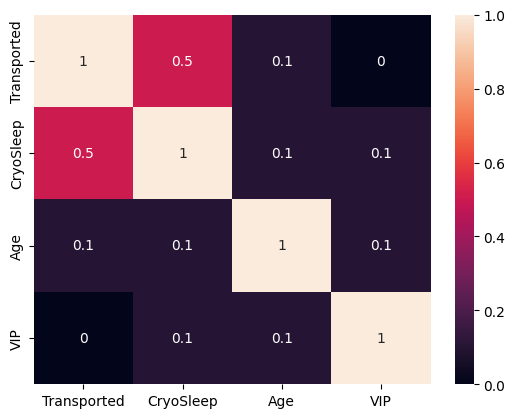

In [49]:
sns.heatmap(
  round(abs(filtered_df.corr()), 1,),
  annot=True,
)

In [50]:
train_input, test_input, train_output, test_output = train_test_split(
  filtered_df.drop("Transported", axis=1),
  filtered_df["Transported"],
  test_size=0.2
)

In [51]:
model = GaussianNB()
model.fit(train_input, train_output)
predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)
print(f"Точность модели на тестовом участке = {accuracy}")

Точность модели на тестовом участке = 0.718803910293272
